In [1]:
import mediapipe as mp
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles

In [14]:
images_path = Path('test_images')
im = images_path / Path('Mark-Zuckerberg-FB.jpg')
#im = images_path / Path('hand.jpg')
im = images_path / Path('full.jpg')
#im = images_path / Path('download.png')
images = {im: cv2.imread(str(im))}

In [15]:
DESIRED_HEIGHT = 800
DESIRED_WIDTH = 600
def resize_and_show(image):
    h, w = image.shape[:2]
    if h < w:
        img = cv2.resize(image, (DESIRED_WIDTH, math.floor(h/(w/DESIRED_WIDTH))))
    else:
        img = cv2.resize(image, (math.floor(w/(h/DESIRED_HEIGHT)), DESIRED_HEIGHT))
    
    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

Nose coordinates: (464.4968639612198, 173.42717045545578)
Pose landmarks of test_images/full.jpg:


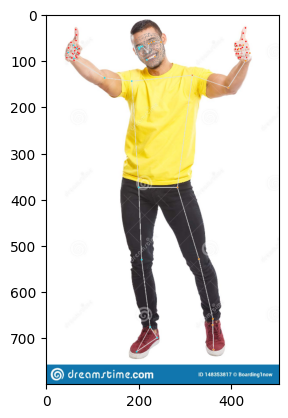

In [16]:
# Run MediaPipe Holistic and draw pose landmarks.
with mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as holistic:
    for name, image in images.items():
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
        results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        # Print nose coordinates.
        image_hight, image_width, _ = image.shape
        if results.pose_landmarks:
            print(
                f'Nose coordinates: ('
                f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
                f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_hight})'
            )

        # Draw pose landmarks.
        print(f'Pose landmarks of {name}:')
        annotated_image = image.copy()
        mp_drawing.draw_landmarks(annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
        mp_drawing.draw_landmarks(
            annotated_image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=mp_drawing_styles
            .get_default_face_mesh_tesselation_style())
        mp_drawing.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.
            get_default_pose_landmarks_style())
        resize_and_show(annotated_image)

In [10]:
coords = ["x", "y", "z"]
keypoint_names = []
keypoint_names.append("frame")

count = 0
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        keypoint_names.append("R"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1

count = 0
for landmark in mp_holistic.HandLandmark:
    for coord in coords:
        keypoint_names.append("L"+str(landmark) + "_" + str(count) + "_" + coord)
    count+=1

count = 0
for landmark in mp_holistic.PoseLandmark:
    for coord in coords:
        keypoint_names.append(str(landmark) + "_" + str(count) + "_" + coord)
    count+=1
    if count == 15:
        break

In [14]:
df = pd.DataFrame([], columns= keypoint_names)
df

,frame,RHandLandmark.WRIST_0_x,RHandLandmark.WRIST_0_y,RHandLandmark.WRIST_0_z,RHandLandmark.THUMB_CMC_1_x,RHandLandmark.THUMB_CMC_1_y,RHandLandmark.THUMB_CMC_1_z,RHandLandmark.THUMB_MCP_2_x,RHandLandmark.THUMB_MCP_2_y,RHandLandmark.THUMB_MCP_2_z,...,PoseLandmark.LEFT_SHOULDER_11_z,PoseLandmark.RIGHT_SHOULDER_12_x,PoseLandmark.RIGHT_SHOULDER_12_y,PoseLandmark.RIGHT_SHOULDER_12_z,PoseLandmark.LEFT_ELBOW_13_x,PoseLandmark.LEFT_ELBOW_13_y,PoseLandmark.LEFT_ELBOW_13_z,PoseLandmark.RIGHT_ELBOW_14_x,PoseLandmark.RIGHT_ELBOW_14_y,PoseLandmark.RIGHT_ELBOW_14_z


In [18]:
# leer videos
path = "gestures/"
words = [words for words in os.listdir(path) if os.path.isdir(os.path.join(path, words))]
# Todos los videos se cambian a  resolucion (600x900), para su mejor deteccion de puntos.
HEIGHT = 600
WIDTH  = 900
for word in words:
    for video in os.listdir(os.path.join(path, word)):
        # Direccion donde se encuentran los videos
        video_path = os.path.join(os.path.join(path, word), video)
        print(video_path)
        # Captura de videos
        cap = cv2.VideoCapture(video_path)
        # Inizializar modelo holistico
        with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
            while cap.isOpened():
                # Leer sequencia
                ret, frame = cap.read()
                if ret == True:
                    # Redimensionar sequencia
                    frame = cv2.resize(frame, (WIDTH, HEIGHT), interpolation = cv2.INTER_AREA)
                    # Cambiar  color de BGR a RGB
                    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    frame.flags.writeable = False
                    # Deteccion puntos de referencia
                    results = holistic.process(frame)
                    try:
                        # Añadir coordenadas a la lista
                        row = []
                        # El nombre de las palabras es añadida a la lista
                        row.append(word)
                        ## Detectar puntos mano derecha ( rhand)
                        for landmark in results.right_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Detectar puntos mano iquierda ( lhand)
                        for landmark in results.left_hand_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                        ## Detectar puntos cuerpo ( pose)
                        count = 0
                        for landmark in results.pose_landmarks.landmark:
                            row.append(landmark.x)
                            row.append(landmark.y)
                            row.append(landmark.z)
                            count += 1
                            if count == 15:
                                break
                        df.loc[len(df)] = row
                    except:
                        pass
                else:
                    break
            cap.release()

NameError: name 'os' is not defined

In [ ]:
# Run MediaPipe Holistic and draw pose landmarks.
cap = cv2.VideoCapture('1704078832.mp4')
with mp_holistic.Holistic(
    static_image_mode=True, min_detection_confidence=0.5, model_complexity=2) as holistic:
    while cap.isOpened():
    success, image = cap.read()
    if not success:
        print("Ignoring empty camera frame.")
        # If loading a video, use 'break' instead of 'continue'.
        continue
    # Convert the BGR image to RGB and process it with MediaPipe Pose.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    # Print nose coordinates.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Holistic', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
        break
cap.release()

In [7]:
from IPython.display import Video

Video("vocabulario para salud basico.mp4", width=400, height=300)